<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-upload" data-toc-modified-id="Data-upload-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data upload</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Defining-a-user-portrait-for-each-region" data-toc-modified-id="Defining-a-user-portrait-for-each-region-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Defining a user portrait for each region</a></span><ul class="toc-item"><li><span><a href="#User-profile-for-the-NA-region" data-toc-modified-id="User-profile-for-the-NA-region-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>User profile for the NA region</a></span></li><li><span><a href="#User-profile-for-the-EU-region" data-toc-modified-id="User-profile-for-the-EU-region-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>User profile for the EU region</a></span></li><li><span><a href="#User-profile-for-the-Japan-region" data-toc-modified-id="User-profile-for-the-Japan-region-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>User profile for the Japan region</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Testing-statistical-hypotheses" data-toc-modified-id="Testing-statistical-hypotheses-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing statistical hypotheses</a></span><ul class="toc-item"><li><span><a href="#The-average-user-ratings-of-the-Xbox-One-and-PC-platforms-are-the-same" data-toc-modified-id="The-average-user-ratings-of-the-Xbox-One-and-PC-platforms-are-the-same-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The average user ratings of the Xbox One and PC platforms are the same</a></span></li><li><span><a href="#Average-user-ratings-of-the-genres-Action-(English-&quot;action&quot;,-action-games)-and-Sports-(English-&quot;sports-competitions&quot;)-are-different" data-toc-modified-id="Average-user-ratings-of-the-genres-Action-(English-&quot;action&quot;,-action-games)-and-Sports-(English-&quot;sports-competitions&quot;)-are-different-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Average user ratings of the genres Action (English "action", action games) and Sports (English "sports competitions") are different</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Studying the patterns determining the game success

## Data upload

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('/datasets/games.csv')

In [2]:
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16130,WinBack 2: Project Poseidon,PS2,2006.0,Shooter,0.01,0.01,0.00,0.00,48.0,tbd,T
1292,Disney Princess,GBA,2003.0,Platform,1.04,0.37,0.00,0.06,NaN,tbd,E
5210,MechAssault 2: Lone Wolf,XB,2004.0,Simulation,0.27,0.08,0.00,0.01,81.0,7.5,T
11483,Jikkyou Powerful Major League 2009,PS2,2009.0,Sports,0.00,0.00,0.08,0.00,NaN,NaN,NaN
7906,Singstar: Ultimate Party,PS4,2014.0,Misc,0.00,0.16,0.00,0.03,47.0,4.1,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.duplicated().sum()

0

There are no duplicates in the data.

In [5]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Missed values in the 'Name' column are not critical for the further analysis. Rows with omissions in the Year_of_Release, Genre columns will be discarded due to their small number.

In [6]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

The data contains information from 1980.

In [7]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In addition to numeric values, the User_Score column contains the abbreviation "tbd"/ "to be done", i.e., the rating has not yet been assigned. Most likely, this is applicable for new games.

In [8]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Let's see what each abbreviation means.

"E" ("Everyone") — "For everyone"; "M" ("Mature") — "For adults"; "T" ("Teen") — "Teenagers"; "E10+" ("Everyone 10 and older"); "K-A" ("Kids to Adults"), equivalent to "E"; "AO" ("Adults Only 18+") — "Adults only"; "EC" ("Early childhood") — "For younger children"; "RP" ("Rating Pending") — "Rating expected".

Most likely, the latter category is applicable for new games.

### Conclusion

The columns will need to be formated to lowercase. There are no complete duplicates in the data. The name of the game can contain both the year and the country of release. The data contains information dating back to 1980, so the missed values the rating columns look logical, given that the ESRB was founded in 1994.

## Data preprocessing

In [9]:
df.columns = df.columns.str.lower()

#the column names to lowercase

In [10]:
df = df.query('year_of_release>0')
#вкщз the lines with the missing year of release of the game

In [11]:
df['year_of_release'] = df['year_of_release'].astype('int')

We do not know the reason for the formation of missed values in the user_score column. Replace them with the marker "-1". We will do the same with the values of "tbd".

In [12]:
df['user_score']=df['user_score'].fillna(value=-1)

In [13]:
df['user_score']=df['user_score'].replace(to_replace='tbd', value=-1)
df['user_score']=df['user_score'].astype('float64')

In [14]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [15]:
df['rating'].replace(to_replace="K-A", value="E")
#replace the "K-A" rating with an equivalent "E" rating

0          E
1        NaN
2          E
3          E
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: rating, Length: 16446, dtype: object

In [16]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
#let's calculate the total sales in all regions and record them in a separate column

In [17]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,7983.000000,16446.000000,16446.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,68.994363,2.687632,0.536105
std,5.877050,0.818416,0.506696,0.311082,0.187994,13.920060,4.170069,1.558763
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,-1.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,-1.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,7.300000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


### Conclusion

Some abnormal values are not visible in the final date frame. You can move on to EDA.

## Exploratory data analysis

In [18]:
df.groupby('year_of_release').count()

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
year_of_release,,,,,,,,,,,
1980,9,9,9,9,9,9,9,0,9,0,9
1981,46,46,46,46,46,46,46,0,46,0,46
1982,36,36,36,36,36,36,36,0,36,0,36
1983,17,17,17,17,17,17,17,0,17,0,17
1984,14,14,14,14,14,14,14,0,14,0,14
1985,14,14,14,14,14,14,14,1,14,1,14
1986,21,21,21,21,21,21,21,0,21,0,21
1987,16,16,16,16,16,16,16,0,16,0,16
1988,15,15,15,15,15,15,15,1,15,1,15


Up until 2000, the games that were assigned a rating were rare cases.

In [19]:
display(df.groupby(by=["platform"])['total_sales'].sum().sort_values(ascending=False).head(10))
#let's choose the platforms with the highest total sales

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

Let's look at the platforms where the number of game sales is close to 1 billion sales chart for the top 4 platforms copies.

In [20]:
platform_list=['PS2','X360','PS3','Wii']
df_platforms=df.query('platform in @platform_list')
#filter data

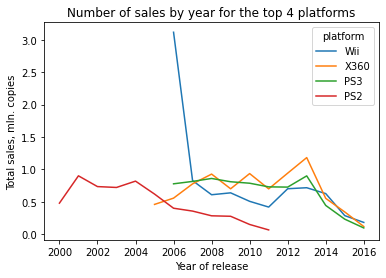

In [21]:
sns.lineplot(data = df_platforms, x = "year_of_release", y = "total_sales", hue="platform", ci=None)
sns.set(rc={'figure.figsize':(15,6)})
plt.title('Number of sales by year for the top 4 platforms')
plt.ylabel('Total sales, mln. copies')
plt.xlabel('Year of release')
plt.show()
# sales chart for the top 4 platforms

The chart shows that the average lifetime of the platform is about 10 years.

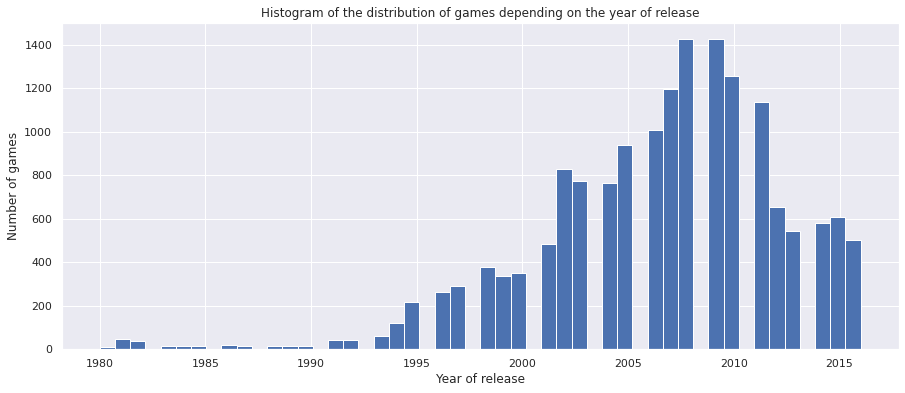

In [22]:
df['year_of_release'].hist(bins=50)
plt.title('Histogram of the distribution of games depending on the year of release')
plt.ylabel('Number of games')
plt.xlabel('Year of release')
plt.show()

The production of games reaches its peak between 2005 and 2010, and then sharply declines, which is associated with the spread of smartphones around the world. We can say that the market has stabilized since 2012: the number of games produced per year ranges from 502 to 653. We will use this data when building a sales forecast for 2017. The difference between the forecast year and the first year in the data is half of the average lifetime of the platform - 5 years.

In [23]:
df_work=df.query('year_of_release >= 2012')
#saving the current data to the new dataframe for further work

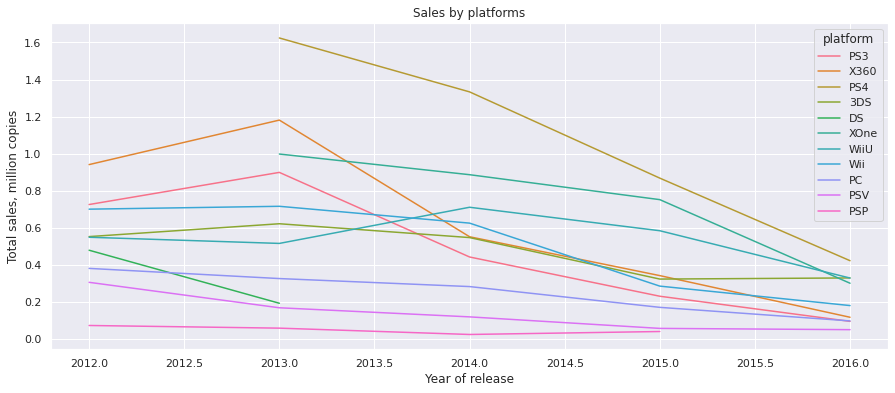

In [24]:
sns.lineplot(data = df_work, x = "year_of_release", y = "total_sales", hue="platform", ci=None)
sns.set(rc={'figure.figsize':(17,9)})
plt.title('Sales by platforms')
plt.ylabel('Total sales, million copies')
plt.xlabel('Year of release')
plt.show()

Sales on all platforms are falling, except for PSV and 3DS.

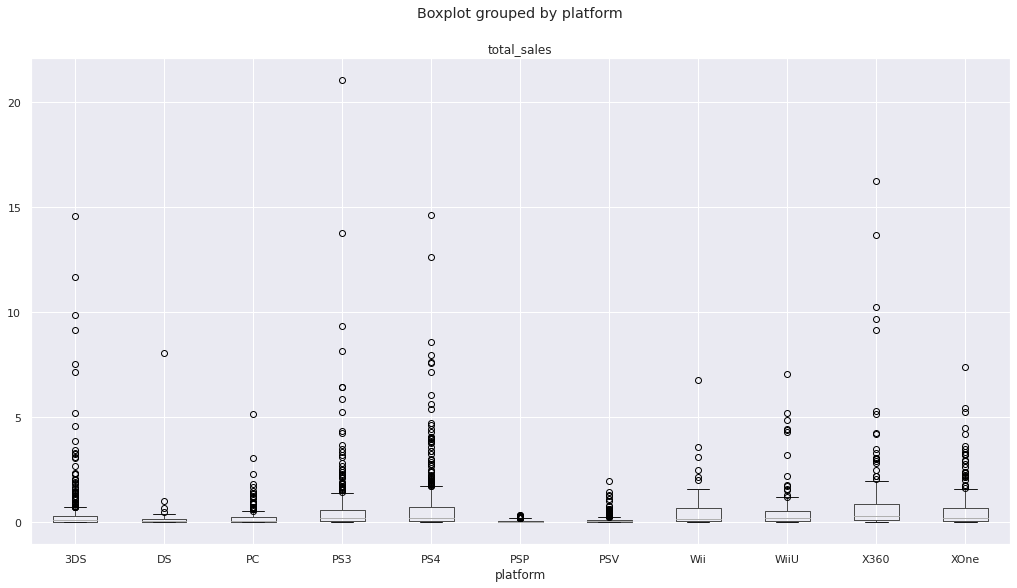

<Figure size 1080x504 with 0 Axes>

In [25]:
df_work.boxplot('total_sales', by='platform')
fig = plt.figure(figsize=(15,7))

#building a boxplot chart chart for global game sales by platform

There are platforms with exceptionally high sales cases: PS3, PS4, X360, 3DS. The smallest in terms of the number of copies sold of the PSP, DS, PSV platforms.

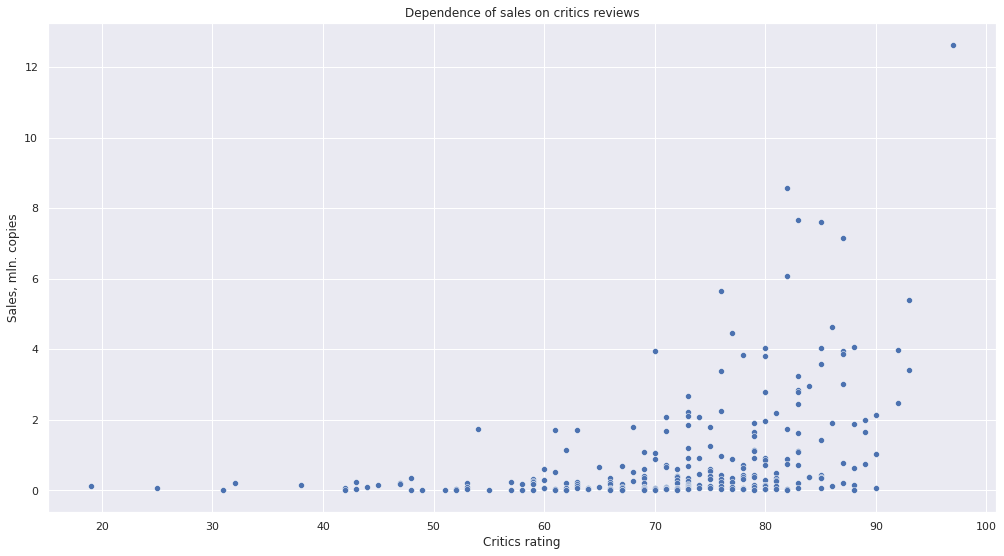

In [26]:
df_ps4=df_work.query('platform=="PS4"')
sns.scatterplot(data = df_ps4, x = "critic_score", y = "total_sales")
sns.set(rc={'figure.figsize':(17,9)})
plt.title('Dependence of sales on critics reviews')
plt.ylabel('Sales, mln. copies')
plt.xlabel('Critics rating')
plt.show()
# looking at the scatter diagram of the relationship between reviews and sales for the PS4 platform

In [27]:
corr=df_ps4['total_sales'].corr(df_ps4['critic_score'])
print('Correlation between critical reviews and the number of copies sold for the PS4 platform', '{:.1%}'.format(corr))
# calculating the correlation between reviews and sales

Correlation between critical reviews and the number of copies sold for the PS4 platform 40.7%


There is a weak direct relationship between critics' reviews and game sales.

In [28]:
df_work_grouped=df_work.groupby(by=["genre"])['total_sales'].sum().reset_index()
df_work_grouped.sort_values(by='total_sales',ascending=False)
#games sale by genre

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


In [29]:
df_work_grouped=df_work.groupby(by=["genre"])['total_sales'].count().reset_index()
df_work_grouped.sort_values(by='total_sales',ascending=False)
# looking at the number of games released on different platforms by genre

,genre,total_sales
0,Action,1031
7,Role-Playing,370
1,Adventure,302
10,Sports,268
8,Shooter,235
3,Misc,192
6,Racing,115
2,Fighting,109
4,Platform,85
9,Simulation,80


In [30]:
df_work.groupby(by=["genre"])['total_sales'].mean()

genre
Action          0.427856
Adventure       0.097450
Fighting        0.408165
Misc            0.442917
Platform        0.717647
Puzzle          0.174643
Racing          0.465217
Role-Playing    0.521081
Shooter         1.296723
Simulation      0.439000
Sports          0.675634
Strategy        0.187887
Name: total_sales, dtype: float64

According to the number of games released on different platforms, the genres of Action, Role-Playing, Adventure are leading. The Shooter genre is in second place in terms of the number of copies sold after the Action genre, but only in fifth place in terms of the number of original games. On average, 1 Shooter genre game sells 1.3 million copies, and the Action genre - 0.43. The most unprofitable is the Adventure genre: on average, 1 game sells 0.1 million copies.

### Conclusion

The genre of the game seems to be the main factor determining its success in the market, critics' ratings are not so important.

## Defining a user portrait for each region

Let's look at popular genres, platforms, as well as the dependence of sales on ESRB ratings in the three largest markets separately: NA, EU and JP.

### User profile for the NA region

In [31]:
df_na=df_work.query('na_sales>0')

In [32]:
display(df_na[['na_sales','platform']].groupby(by=["platform"]).sum().sort_values(by=['na_sales'], ascending=False).head(5))
#define the top 5 most popular platforms in this market

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


In [33]:
df_na_share = df_na[['na_sales','platform']].groupby(by=["platform"]).sum().sort_values(by=['na_sales'], ascending=False)
with pd.option_context('display.float_format', '{:.2%}'.format):
    display(df_na_share.transform(lambda x: x/x.sum()))
#look at the share of each platform in total sales by region

,na_sales
platform,
X360,23.70%
PS4,18.40%
PS3,17.49%
XOne,15.76%
3DS,9.36%
WiiU,6.45%
PC,3.24%
Wii,2.95%
PSV,1.86%


In [34]:
display(df_na.groupby(by=["genre"]).sum().sort_values(by=['na_sales'], ascending=False).head(5))
#define the top 5 most popular genres in this market

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
genre,,,,,,,,
Action,1186165,177.84,155.01,23.63,50.64,26618.0,2826.8,407.12
Shooter,426959,144.77,112.49,8.83,37.22,11937.0,1149.0,303.31
Sports,366543,81.53,64.77,3.53,21.88,8939.0,877.8,171.71
Role-Playing,392712,64.00,47.36,40.67,14.69,9835.0,956.6,166.72
Misc,209451,38.19,25.74,6.18,7.61,3863.0,396.8,77.72


In [35]:
df_na_rating = df_na.groupby(by=["rating"]).sum().reset_index()
df_na_rating[['rating','na_sales']].sort_values(by=['na_sales'], ascending=False)
#look at the total sales by region, depending on the ESRB rating

,rating,na_sales
2,M,231.57
0,E,114.37
1,E10+,75.70
3,T,66.02


Adults play games the most in North America: the number of sales of games with an "M" rating is 2 times higher than the number of sales of games with an "E" rating. The most popular genres are Action, Shooter and Sports, which are among the top 5 most popular genres in the general data set over the past years. The most popular 4 platforms are located close to each other: the value of their share in total sales ranges from 23.7% for X360 to 15.76% for XOne. We can say that Microsoft products are more popular in this market than Sony.

### User profile for the EU region

In [36]:
df_eu=df_work.query('eu_sales>0')

In [37]:
display(df_eu[['eu_sales','platform']].groupby(by=["platform"]).sum().sort_values(by=['eu_sales'], ascending=False).head(5))
#define the top 5 most popular platforms in this market

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


In [38]:
df_eu_share = df_eu[['eu_sales','platform']].groupby(by=["platform"]).sum().sort_values(by=['eu_sales'], ascending=False)
with pd.option_context('display.float_format', '{:.2%}'.format):
    display(df_eu_share.transform(lambda x: x/x.sum()))
#look at the share of each platform in total sales by region

,eu_sales
platform,
PS4,27.84%
PS3,21.08%
X360,14.70%
XOne,10.18%
3DS,8.41%
PC,7.45%
WiiU,4.96%
Wii,2.35%
PSV,2.24%


In [39]:
display(df_eu[['eu_sales','genre']].groupby(by=["genre"]).sum().sort_values(by=['eu_sales'], ascending=False).head(5))
#define the top 5 most popular genres in this market

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


In [40]:
df_eu_rating = df_eu.groupby(by=["rating"]).sum().reset_index()
df_eu_rating[['rating','eu_sales']].sort_values(by=['eu_sales'], ascending=False)
#look at the total sales by region, depending on the ESRB rating

,rating,eu_sales
2,M,193.96
0,E,113.03
1,E10+,55.37
3,T,52.96


The market leaders in console sales are still Microsoft and Playstation, but Playstation was more popular in Europe. As in North America, the most popular games are adult games. We see the same picture as in the North American market by genre.

### User profile for the Japan region

In [41]:
df_jp=df_work.query('jp_sales>0')

In [42]:
display(df_jp[['jp_sales','platform']].groupby(by=["platform"]).sum().sort_values(by=['jp_sales'], ascending=False).head(5))
#define the top 5 most popular platforms in this market

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


In [43]:
df_jp_share = df_jp[['jp_sales','platform']].groupby(by=["platform"]).sum().sort_values(by=['jp_sales'], ascending=False)
with pd.option_context('display.float_format', '{:.2%}'.format):
    display(df_jp_share.transform(lambda x: x/x.sum()))
#look at the share of each platform in total sales by region

,jp_sales
platform,
3DS,45.59%
PS3,18.32%
PSV,10.93%
PS4,8.29%
WiiU,6.76%
PSP,5.44%
DS,1.93%
Wii,1.76%
X360,0.82%


In [44]:
display(df_jp[['jp_sales','genre']].groupby(by=["genre"]).sum().sort_values(by=['jp_sales'], ascending=False).head(5))
#define the top 5 most popular genres in this market

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


In [45]:
df_jp_rating = df_jp.groupby(by=["rating"]).sum().reset_index()
df_jp_rating[['rating','jp_sales']].sort_values(by=['jp_sales'], ascending=False)
#look at the total sales by region, depending on the ESRB rating

,rating,jp_sales
0,E,28.33
3,T,26.02
2,M,21.20
1,E10+,8.19


The absolute leader in the console market in Japan is the 3DS, which gives 3D images, produced by the Japanese company Nintendo. Among popular genres, Action has shifted to second place, giving way to the Role-Playing genre. Interestingly, this genre was not included in the top 5 popular in the market of Europe and NA. According to the ESRB rating, the Japanese market is also different from the previous two:

### Conclusion

The preferences of buyers in the EU and NA markets are similar, while the Japanese market presents a completely different picture. This should be taken into account when planning marketing campaigns.

## Testing statistical hypotheses

### The average user ratings of the Xbox One and PC platforms are the same

General populations are ratings for all games on the Xbox platform and ratings for all games on the PC platform. To determine the equal_var parameter for the st.ttest_ind method, we calculate the variances of both samples.

Null hypothesis is the average user rating on the Xbox platform is equal to the average user rating on the PC platform. Alternative is average ratings are not equal. The statistical significance level is defined as 5% as the most common option for most tests.

In [46]:
sample_1 = df_work.query('(platform=="XOne") & (user_score > -1)')['user_score'] 
sample_2 = df_work.query('(platform=="PC") & (user_score > -1)')['user_score'] 

variance_xbox = np.var(sample_1, ddof=1)
print('Variance of user ratings, Xbox platform', variance_xbox)

variance_pc = np.var(sample_2, ddof=1)
print('Variance of user ratings, PC platform', variance_pc)

#calculate the variances to determine the equal_var parameter in the statistical test
#since we do not have the general population at our disposal, but a part of it, we will specify ddof=1 in the parameters

Variance of user ratings, Xbox platform 1.9069968429360695
Variance of user ratings, PC platform 2.770443997158418


In [47]:
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = 0.05  # critical level of statistical significance
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Cannot reject the null hypothesis')

p-value: 0.5489537965134912
Cannot reject the null hypothesis


Based on the available data, it is possible to reject the assumption that the average user ratings for the Xbox One and PC platforms are different, because with a 55% probability such differences can be obtained randomly. This is clearly too high a probability to conclude that there is a significant difference between the averages.

### Average user ratings of the genres Action (English "action", action games) and Sports (English "sports competitions") are different

General populations are ratings for all games of the "Action" genre and ratings for all games of the "Sports" genre. To determine the equal_var parameter for the st.ttest_ind method, we calculate the variances of both samples.

Null hypothesis - the average user rating for games of the "Action" genre is equal to the average user rating for games of the "Sports" genre. Alternative - average ratings are not equal. The statistical significance level is defined as 5% as the most common option for most tests.

In [48]:
sample_1 = df_work.query('genre=="Action" & user_score>-1')['user_score']
sample_2 = df_work.query('genre=="Sports" & user_score>-1')['user_score']

variance_action = np.var(sample_1, ddof=1)
print('Variance of user ratings, Action genre', variance_xbox)

variance_sports = np.var(sample_2, ddof=1)
print('Variance of user ratings, Sports genre', variance_pc)

#calculate the variances to determine the equal_var parameter in the statistical test
#since we do not have the general population at our disposal, but a part of it, we will specify ddof=1 in the parameters

Variance of user ratings, Action genre 1.9069968429360695
Variance of user ratings, Sports genre 2.770443997158418


In [49]:
results = st.ttest_ind(sample_1, sample_2, equal_var = False)
alpha = 0.05  # critical level of statistical significance
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesi')
else:
    print('Cannot reject the null hypothesis')

p-value: 4.24307776572644e-20
Reject the null hypothesi


Based on the available data, we do not reject the assumption that the average user ratings for the two genres differ.

### Conclusion

Probably, the genre of the game affects the user rating more than what kind of console it is played on.

## Conclusion

The main factors determining the success of the game on the market are its genre, type of platform, and age rating.

When planning companies in the Japanese market, it is worth betting on advertising Role-Playing games developed for the 3DS platform: these costs should bring the greatest return. For the North American market, the biggest sales potential is games developed for the X360 console in the Action genre, while for the European market it is worth betting on advertising products developed for the PS4, PS3 consoles.

For the North American and European markets, games rated "For adults" will bring the greatest return, while for Japan it is worth betting on games for teenagers. In all markets, a significant share of sales are games with an "E" rating as with the greatest coverage.